<a href="https://colab.research.google.com/github/Ezraliano/Sentiment_analysis_oxford/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud

In [22]:
# Loading Data
df_sentiment = pd.read_csv('university_of_oxford_tripadvisor_reviews.csv')

In [23]:
df_sentiment.head()

,helpfulVotes,publishedDate,publishedPlatform,rating,text,title,tripType
0,0,2024-10-04,OTHER,4,Visit today university of oxford amazing archi...,Happy,FAMILY
1,0,2024-09-17,OTHER,4,Having some difficulty with walking and standi...,Fabulous Buildings and Architecture,COUPLES
2,0,2024-09-16,MOBILE,5,"Founded in the 12th century, it’s not only one...",One of world’s oldest universities,BUSINESS
3,0,2024-09-07,OTHER,4,To visit this interesting museum it is essenti...,Oxford University Press Museum,SOLO
4,0,2024-08-15,MOBILE,4,伦敦到牛津的高铁一般都是从两个站出发：\n去程：London Paddington or L...,牛津大学,FRIENDS


In [ ]:
# Data Preprocessing

In [24]:
df_sentiment.shape

(1119, 7)

In [25]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   helpfulVotes       1119 non-null   int64 
 1   publishedDate      1119 non-null   object
 2   publishedPlatform  1119 non-null   object
 3   rating             1119 non-null   int64 
 4   text               1119 non-null   object
 5   title              1119 non-null   object
 6   tripType           1091 non-null   object
dtypes: int64(2), object(5)
memory usage: 61.3+ KB


In [26]:
#melihat missing values
df_sentiment.isnull().sum()

,0
helpfulVotes,0
publishedDate,0
publishedPlatform,0
rating,0
text,0
title,0
tripType,28


In [27]:
df_sentiment[df_sentiment['tripType'].isnull()].head()

,helpfulVotes,publishedDate,publishedPlatform,rating,text,title,tripType
721,0,2015-05-20,MOBILE,5,Visited the University with a small group of o...,How very British!,NaN
741,0,2015-04-07,MOBILE,4,Being a consistent top university in the world...,Worth seeing,NaN
743,3,2015-04-04,MOBILE,5,There are many paid sightseeing tours of Oxfor...,Wonderful sightseeing,NaN
763,3,2015-02-26,MOBILE,5,I went to oxford a couple of weeks ago and it ...,Makes you want to study hard,NaN
774,0,2015-02-09,MOBILE,4,After deciding that we wanted to visit oxford ...,What a truly breathtaking afternoon wander.,NaN


In [28]:
df_sentiment['tripType'].unique()

array(['FAMILY', 'COUPLES', 'BUSINESS', 'SOLO', 'FRIENDS', 'NONE', nan],
      dtype=object)

In [29]:
# Menghitung data tripType
df_sentiment['tripType'].value_counts()

,count
tripType,
COUPLES,361
FAMILY,229
FRIENDS,196
NONE,149
SOLO,113
BUSINESS,43


In [30]:
# Mencari nilai modus pada kolom tripType
tripType_mode = df_sentiment['tripType'].mode()[0]
print(tripType_mode)


COUPLES


In [ ]:
df_sentiment['tripType'].fillna(df_sentiment['tripType'].mode()[0], inplace=True)


In [33]:
# Melihat missing value yang sudah terisi dengan data modus
df_sentiment.isnull().sum()

,0
helpfulVotes,0
publishedDate,0
publishedPlatform,0
rating,0
text,0
title,0
tripType,0


In [17]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   helpfulVotes       1119 non-null   int64 
 1   publishedDate      1119 non-null   object
 2   publishedPlatform  1119 non-null   object
 3   rating             1119 non-null   int64 
 4   text               1119 non-null   object
 5   title              1119 non-null   object
 6   tripType           1119 non-null   object
dtypes: int64(2), object(5)
memory usage: 61.3+ KB


In [20]:
#Mengubah tipe data text menjadi string
df_sentiment['text'] = df_sentiment['text'].astype(str)

In [34]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   helpfulVotes       1119 non-null   int64 
 1   publishedDate      1119 non-null   object
 2   publishedPlatform  1119 non-null   object
 3   rating             1119 non-null   int64 
 4   text               1119 non-null   object
 5   title              1119 non-null   object
 6   tripType           1119 non-null   object
dtypes: int64(2), object(5)
memory usage: 61.3+ KB


In [35]:
df_sentiment['sentiment']= df_sentiment['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [36]:
df_sentiment['sentiment_category']= df_sentiment['sentiment'].apply(lambda x: 'positive' if x>0 else ('negative' if x<0 else 'neutral'))

In [37]:
sentiment_distribution = df_sentiment['sentiment_category'].value_counts()
print('sentiment_distribution')
print(sentiment_distribution)

sentiment_distribution
sentiment_category
positive    1067
neutral       27
negative      25
Name: count, dtype: int64


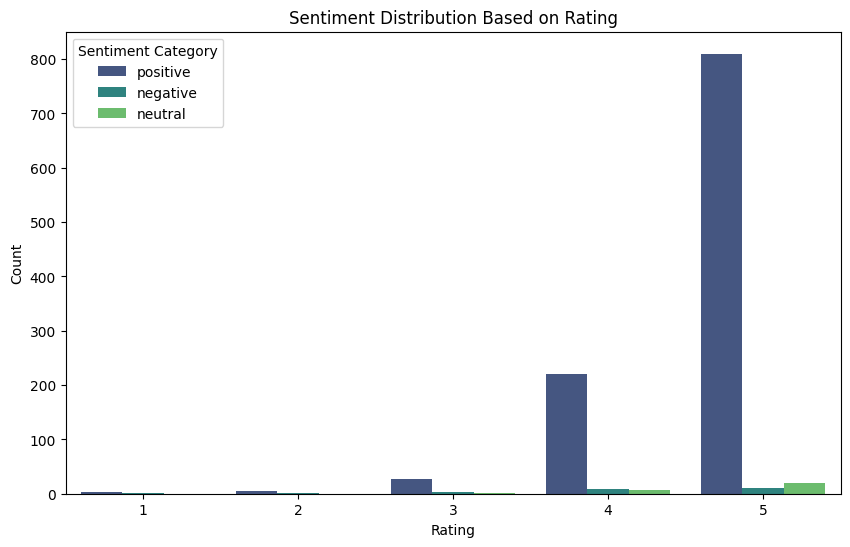

In [39]:
# Visualisasi sentiment berdasarkan  rating

plt.figure(figsize=(10,6))
sns.countplot(data=df_sentiment, x='rating',
              hue='sentiment_category' ,
              palette= 'viridis')
plt.title('Sentiment Distribution Based on Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.show()

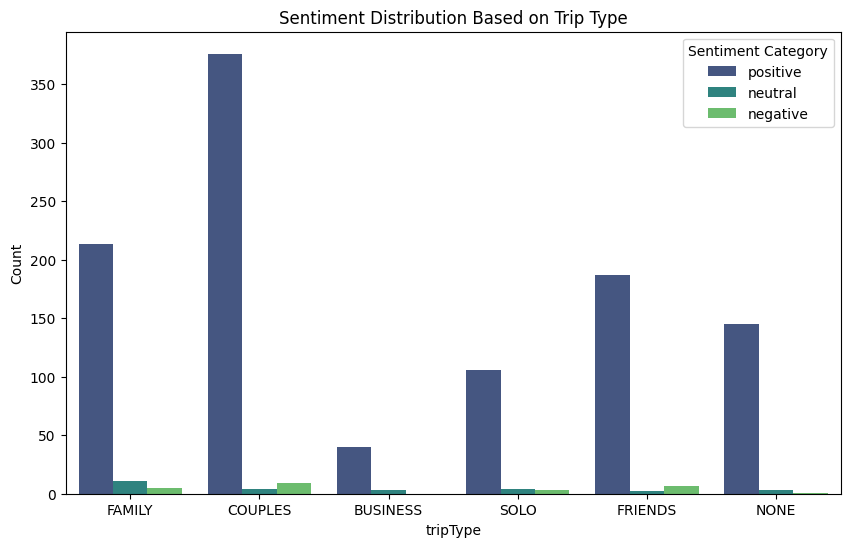

In [40]:
#Analisa Sentiment berdasarkan tripType

plt.figure(figsize=(10,6))
sns.countplot(data=df_sentiment, x='tripType',
              hue='sentiment_category' ,
              palette= 'viridis')
plt.title('Sentiment Distribution Based on Trip Type')
plt.xlabel('tripType')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.show()

In [42]:
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap= 'Greens').generate(' '.join(df_sentiment[df_sentiment['sentiment_category']=='positive']['text']))
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap= 'Reds').generate(' '.join(df_sentiment[df_sentiment['sentiment_category']=='negative']['text']))

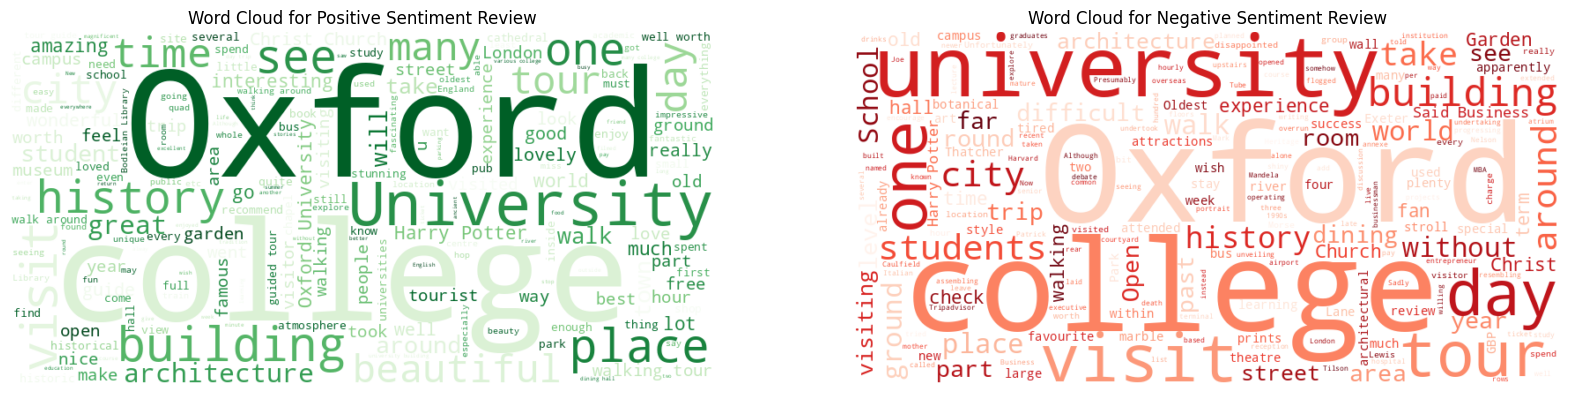

In [43]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].imshow(positive_wc, interpolation='bilinear')
axes[0].set_title('Positive Reviews Word Cloud')
axes[0].axis('off')
axes[0].set_title('Word Cloud for Positive Sentiment Review')
axes[1].imshow(negative_wc, interpolation='bilinear')
axes[1].set_title('Word Cloud for Negative Sentiment Review')
axes[1].axis('off')
plt.show()

In [44]:
df_sentiment.to_csv('sentiment_analysis.csv', index=True)